In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.colors import LogNorm      
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
from matplotlib.ticker import MaxNLocator

from labellines import labelLine, labelLines
from matplotlib.lines import Line2D
import pandas as pd
zps = {'J':1587, 'H':1074, 'Ks':653,'F277W':427, 'L':253, 'F430M':194, 'Mp':150, 'N2': 34.9,'F1500W':18,'F2100W':8}

In [11]:
instru = 'metis'
datasets = []
for casedir in ['5', '1', '2','0']:
    for inc in ['0','30','60']:
        tablename = f'data{casedir}_inc{inc}'
        data = pd.read_csv(f"flux_tables/table_{instru}{casedir}_inc{inc}.csv")
        data = data.rename(columns={"CPD-bg":"flux1","antiCPD-bg":"flux1anti","mag CPD-antiCPD": "mag2", "mag CPD-bg": "mag1"})
        for col in ['mag1','mag2','SNR_CPD']:
            data[col] = pd.to_numeric(data[col],errors='coerce')
        # add a mag1anti column
        mag1anti =  [2.5 * np.log10(zps[data['filter'][i]]/data['flux1anti'][i]) for i in range(len(data))]
        data['mag1anti'] = mag1anti
        exec(f'{tablename} = data')
        exec(f'datasets.append({tablename})')
        
data5_inc0

,model,filter,CPD tot,Background,flux1,flux1anti,CPD-antiCPD,mag1,mag2,SNR_CPD,flag,mag1anti
0,10jup50au,L,0.0157,0.0155,2.660000e-04,8.280000e-07,2.650000e-04,14.95,14.95,321.27,detect,21.212725
1,10jup50au,Mp,0.2830,0.2820,5.360000e-04,4.670000e-06,5.310000e-04,13.62,13.63,114.79,detect,18.766936
2,10jup50au,N2,25.8000,25.8000,1.020000e-02,7.440000e-05,1.010000e-02,8.84,8.85,136.65,detect,14.178131
3,5jup50au,L,0.0155,0.0155,1.720000e-06,9.960000e-07,7.230000e-07,20.42,21.36,1.73,detect,21.012153
4,5jup50au,Mp,0.2820,0.2820,5.990000e-06,3.490000e-06,2.500000e-06,18.50,19.44,1.72,detect,19.083165
5,5jup50au,N2,25.8000,25.8000,1.210000e-04,4.400000e-05,7.740000e-05,13.65,14.14,2.76,detect,14.748432
6,1jup50au,L,0.0155,0.0155,5.580000e-07,5.640000e-07,-6.770000e-09,21.64,NaN,0.99,nondetect,21.629604
7,1jup50au,Mp,0.2820,0.2820,5.790000e-06,5.820000e-06,-3.610000e-08,18.53,NaN,0.99,nondetect,18.527921
8,1jup50au,N2,25.8000,25.8000,6.520000e-05,6.360000e-05,1.540000e-06,14.32,18.38,1.02,nondetect,14.348421
9,1sat50au,L,0.0155,0.0155,7.240000e-07,7.480000e-07,-2.400000e-08,21.36,NaN,0.97,nondetect,21.323047


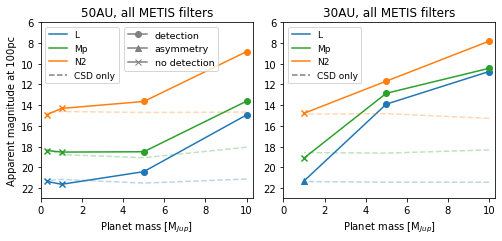

In [13]:
# mass vs mag, diff filters
colors= ['tab:blue','tab:green','tab:orange','tab:red']
plt.figure(figsize=(7,3.3))

for sub in range(2):
    plt.subplot(1,2,sub+1)
    for i in range(3):
        if sub==0:
            x, y, y0, flags = [10,5,1,0.3], data5_inc0.mag1[i:12+i:3].values, data0_inc0.mag1anti[i:12+i:3], data5_inc0.flag[i:12+i:3].values
        elif sub==1:
            x, y, y0, flags = [10,5,1], data5_inc0.mag1[12+i::3].values, data0_inc0.mag1anti[12+i::3], data5_inc0.flag[12+i::3].values
        xdet, ydet = [x[j] for j in range(len(x)) if flags[j] == 'detect'], [y[j] for j in range(len(x)) if flags[j] == 'detect']
        xnon, ynon = [x[j] for j in range(len(x)) if flags[j] == 'nondetect'], [y[j] for j in range(len(x)) if flags[j] == 'nondetect']
        xasy, yasy = [x[j] for j in range(len(x)) if flags[j] == 'asymm'], [y[j] for j in range(len(x)) if flags[j] == 'asymm']
        plt.scatter(xdet, ydet, c=colors[i], marker='o')
        plt.scatter(xnon, ynon, c=colors[i], marker='x')
        plt.scatter(xasy, yasy, c=colors[i], marker='^')
        plt.plot(x, y,label=data5_inc0['filter'][i], color=colors[i])
        plt.plot(x, y0, alpha=0.3, color=colors[i], linestyle='--')
    plt.xlabel('Planet mass [M$_{Jup}$]')
    if sub==0:
        plt.ylabel('Apparent magnitude at 100pc')
    sep = '50AU' if sub==0 else '30AU'
    plt.title(f'{sep}, all METIS filters')
    plt.xlim((0,10.3))
    plt.ylim((23,6))
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
    handles, labels = plt.gca().get_legend_handles_labels()
    line = Line2D([0], [0], label='CSD only', color='gray', linestyle='--')
    handles.append(line)
    legend1 = plt.legend(handles=handles,prop={'size': 9})
    markercolor, markersize = 'gray', 6
    legend_elements = [Line2D([0], [0], marker='o', color=markercolor, label='detection', markerfacecolor=markercolor, markersize=markersize),
                       Line2D([0], [0], marker='^', color=markercolor, label='asymmetry', markerfacecolor=markercolor, markersize=markersize),
                       Line2D([0], [0], marker='x', color=markercolor, label='no detection', markerfacecolor=markercolor, markersize=markersize)
                       ]
    if sub==0:
        legend2 = plt.legend(handles=legend_elements, loc=1, bbox_to_anchor=(0.86, 1),prop={'size': 9.5})
        plt.gca().add_artist(legend1)

plt.tight_layout(pad=0.5)
plt.savefig('../simtools/analysis_plots/metis_mass_mag_filterlines.png', bbox_inches='tight', dpi=200)

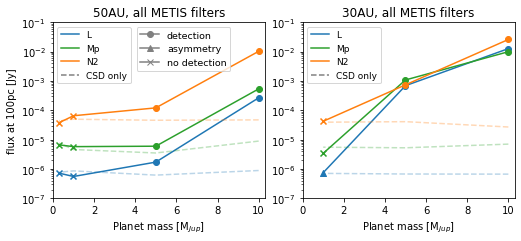

In [22]:
# mass vs mag, diff filters, in Jy
colors= ['tab:blue','tab:green','tab:orange','tab:red']
plt.figure(figsize=(7.2,3.3))

for sub in range(2):
    plt.subplot(1,2,sub+1)
    for i in range(3):
        if sub==0:
            x, y, y0, flags = [10,5,1,0.3], data5_inc0.flux1[i:12+i:3].values, data0_inc0.flux1anti[i:12+i:3], data5_inc0.flag[i:12+i:3].values
        elif sub==1:
            x, y, y0, flags = [10,5,1], data5_inc0.flux1[12+i::3].values, data0_inc0.flux1anti[12+i::3], data5_inc0.flag[12+i::3].values
        xdet, ydet = [x[j] for j in range(len(x)) if flags[j] == 'detect'], [y[j] for j in range(len(x)) if flags[j] == 'detect']
        xnon, ynon = [x[j] for j in range(len(x)) if flags[j] == 'nondetect'], [y[j] for j in range(len(x)) if flags[j] == 'nondetect']
        xasy, yasy = [x[j] for j in range(len(x)) if flags[j] == 'asymm'], [y[j] for j in range(len(x)) if flags[j] == 'asymm']
        plt.scatter(xdet, ydet, c=colors[i], marker='o')
        plt.scatter(xnon, ynon, c=colors[i], marker='x')
        plt.scatter(xasy, yasy, c=colors[i], marker='^')
        plt.plot(x, y,label=data5_inc0['filter'][i], color=colors[i],zorder=0)
        plt.plot(x, y0, alpha=0.3, color=colors[i], linestyle='--')
    plt.xlabel('Planet mass [M$_{Jup}$]')
    if sub==0:
        plt.ylabel('flux at 100pc [Jy]')
    sep = '50AU' if sub==0 else '30AU'
    plt.title(f'{sep}, all METIS filters')
    plt.xlim((0,10.3))
    plt.ylim((1e-7,0.1))
    plt.yscale("log")
    #plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
    handles, labels = plt.gca().get_legend_handles_labels()
    line = Line2D([0], [0], label='CSD only', color='gray', linestyle='--')
    handles.append(line)
    legend1 = plt.legend(handles=handles,prop={'size': 9})
    markercolor, markersize = 'gray', 6
    legend_elements = [Line2D([0], [0], marker='o', color=markercolor, label='detection', markerfacecolor=markercolor, markersize=markersize),
                       Line2D([0], [0], marker='^', color=markercolor, label='asymmetry', markerfacecolor=markercolor, markersize=markersize),
                       Line2D([0], [0], marker='x', color=markercolor, label='no detection', markerfacecolor=markercolor, markersize=markersize)
                       ]
    if sub==0:
        legend2 = plt.legend(handles=legend_elements, loc=1, bbox_to_anchor=(0.86, 1),prop={'size': 9.5})
        plt.gca().add_artist(legend1)

plt.tight_layout(pad=0.5)
plt.savefig('../simtools/analysis_plots/metis_mass_mag_filterlines_Jy.png', bbox_inches='tight', dpi=200)

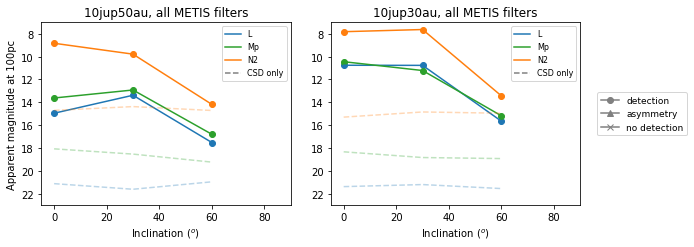

In [22]:
# inc vs mag, diff filters, 10jup
colors= ['tab:blue','tab:green','tab:orange','tab:red']
titles= ['10jup50au','10jup30au','5jup30au']
plt.figure(figsize=(10,3.8))
for sub in range(2):
    plt.subplot(1,2,sub+1)
    for i in range(3):
        if sub==0:
            x, y = [0,30,60], [data5_inc0.mag1[i],data5_inc30.mag1[i],data5_inc60.mag1[i]]
            y0 = [data0_inc0.mag1[i],data0_inc30.mag1[i],data0_inc60.mag1[i]]
            flags =  [data5_inc0.flag[i],data5_inc30.flag[i],data5_inc60.flag[i]]
        elif sub==1:
            x, y = [0,30,60], [data5_inc0.mag1[i+12],data5_inc30.mag1[i+12],data5_inc60.mag1[i+12]]
            y0 = [data0_inc0.mag1[i+12],data0_inc30.mag1[i+12],data0_inc60.mag1[i+12]]
            flags =  [data5_inc0.flag[i+12],data5_inc30.flag[i+12],data5_inc60.flag[i+12]]
        # elif sub==2:
        #     x, y = [0,30,60], [data5_inc0.mag1[i+25],data5_inc30.mag1[i+25],data5_inc60.mag1[i+25]]
        #     y0 = [data0_inc0.mag1[i+25],data0_inc30.mag1[i+25],data0_inc60.mag1[i+25]]
        #     flags =  [data5_inc0.flag[i+25],data5_inc30.flag[i+25],data5_inc60.flag[i+25]]
        xdet, ydet = [x[j] for j in range(len(x)) if flags[j] == 'detect'], [y[j] for j in range(len(x)) if flags[j] == 'detect']
        xnon, ynon = [x[j] for j in range(len(x)) if flags[j] == 'nondetect'], [y[j] for j in range(len(x)) if flags[j] == 'nondetect']
        xasy, yasy = [x[j] for j in range(len(x)) if flags[j] == 'asymm'], [y[j] for j in range(len(x)) if flags[j] == 'asymm']
        plt.scatter(xdet, ydet, c=colors[i], marker='o')
        plt.scatter(xnon, ynon, c=colors[i], marker='x')
        plt.scatter(xasy, yasy, c=colors[i], marker='^')
        plt.plot(x, y, label=data5_inc0['filter'][i], color=colors[i])
        plt.plot(x, y0, alpha=0.3, color=colors[i], linestyle='--')
    plt.xlabel('Inclination ($^{o}$)')
    if sub==0:
        plt.ylabel('Apparent magnitude at 100pc')
    plt.title(f'{titles[sub]}, all METIS filters')
    plt.xlim((-5,90))
    plt.ylim((23,7))
    handles, labels = plt.gca().get_legend_handles_labels()
    line = Line2D([0], [0], label='CSD only', color='gray', linestyle='--')
    handles.append(line)
    legend1 = plt.legend(handles=handles,prop={'size': 8})
    markercolor, markersize = 'gray', 6
    legend_elements = [Line2D([0], [0], marker='o', color=markercolor, label='detection', markerfacecolor=markercolor, markersize=markersize),
                       Line2D([0], [0], marker='^', color=markercolor, label='asymmetry', markerfacecolor=markercolor, markersize=markersize),
                       Line2D([0], [0], marker='x', color=markercolor, label='no detection', markerfacecolor=markercolor, markersize=markersize)]
    if sub==1:
        legend2 = plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.05, 0.5),prop={'size': 9})
        plt.gca().add_artist(legend1)
plt.tight_layout(pad=2)
plt.savefig('../simtools/analysis_plots/metis_inc_mag_filterlines.png', bbox_inches='tight', dpi=200)

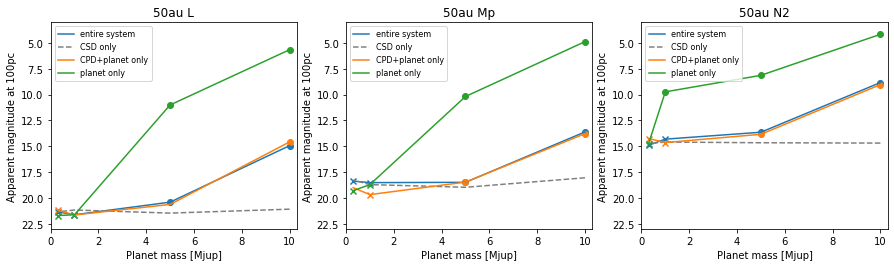

In [25]:
# mass vs magnitude diff cases 50au
colors= ['tab:blue','tab:red','tab:orange','tab:green']
labels= ['entire system', 'CSD only' ,'CPD+planet only', 'planet only']
cases= ['5','0','1','2']
plt.figure(figsize=(15,3.8))

for sub in range(3):
    plt.subplot(1,3,sub+1)
    x = [10,5,1,0.3]
    for i in range(4):
        y = eval(f'data{cases[i]}_inc0.mag1[sub:12+sub:3].values')
        if i==1:
            plt.plot(x, y, color='gray', linestyle='--', label=labels[i])
        else:
            flags =  eval(f'data{cases[i]}_inc0.flag[sub:12+sub:3].values')
            xsat, ysat = [x[j] for j in range(len(x)) if flags[j] == 'sat'], [y[j] for j in range(len(x)) if flags[j] == 'sat']
            xdet, ydet = [x[j] for j in range(len(x)) if flags[j] == 'detect'], [y[j] for j in range(len(x)) if flags[j] == 'detect']
            xnon, ynon = [x[j] for j in range(len(x)) if flags[j] == 'nondetect'], [y[j] for j in range(len(x)) if flags[j] == 'nondetect']
            plt.scatter(xsat, ysat, c=colors[i], marker='D')
            plt.scatter(xdet, ydet, c=colors[i], marker='o')
            plt.scatter(xnon, ynon, c=colors[i], marker='x')
            plt.plot(x, y, color=colors[i], label=labels[i])

    plt.legend(prop={'size': 8},loc=2)
    plt.xlabel('Planet mass [Mjup]')
    plt.ylabel('Apparent magnitude at 100pc')
    plt.title('50au '+data['filter'][sub])
    plt.xlim((0,10.3))
    plt.ylim((23, 3))
plt.savefig('../simtools/analysis_plots/metis_mass_mag_cases_50au.png', bbox_inches='tight', dpi=200)

In [4]:
table=[datasets[0]['model'].values, datasets[0]['filter'].values]
for n in range(len(datasets)):
    col=[]
    for i in range(len(datasets[n])):
        if n > 8:
            a = datasets[n]['mag1anti'][i]
            col.append(f'{a:.2f}')
        else:
            a = datasets[n]['mag2'][i]
            if datasets[n]['flag'][i] == 'sat':
                col.append(f'<{a:.2f}')
            elif datasets[n]['flag'][i] == 'detect':
                col.append(f'{a:.2f}')
            else:
                col.append('/')
    table.append(col)
tabledf = pd.DataFrame.from_records(table).T
tabledf.columns=['model','filter','0$^{\circ}$','30$^{\circ}$','60$^{\circ}$','0$^{\circ}$','30$^{\circ}$','60$^{\circ}$','0$^{\circ}$','30$^{\circ}$','60$^{\circ}$','0$^{\circ}$','30$^{\circ}$','60$^{\circ}$']
tabledf.to_csv(f'./flux_tables/{instru}_combined.csv')
tabledf

,model,filter,0$^{\circ}$,30$^{\circ}$,60$^{\circ}$,0$^{\circ}$,30$^{\circ}$,60$^{\circ}$,0$^{\circ}$,30$^{\circ}$,60$^{\circ}$,0$^{\circ}$,30$^{\circ}$,60$^{\circ}$
0,10jup50au,L,14.95,13.38,17.53,14.59,13.33,17.62,5.66,5.73,5.90,21.13,21.73,20.98
1,10jup50au,Mp,13.63,12.93,16.95,13.79,12.56,16.58,4.88,4.93,5.12,18.06,18.49,19.19
2,10jup50au,N2,8.85,9.80,15.36,9.05,9.23,13.12,4.17,4.19,4.22,14.67,14.37,14.75
3,5jup50au,L,21.36,19.92,/,/,19.69,/,11.01,10.50,11.30,21.53,21.09,21.11
4,5jup50au,Mp,19.44,17.92,/,19.42,18.11,/,10.19,9.75,10.41,19.07,19.03,18.70
5,5jup50au,N2,14.14,14.73,/,14.32,14.69,/,8.14,8.07,8.21,14.70,14.55,14.89
6,1jup50au,L,/,/,/,/,/,/,/,/,/,21.17,20.88,21.48
7,1jup50au,Mp,/,/,/,/,/,/,/,/,/,18.78,18.72,18.71
8,1jup50au,N2,/,/,/,/,/,/,9.75,9.75,9.74,14.62,14.61,14.55
9,1sat50au,L,/,/,/,/,/,/,/,/,/,21.28,21.33,21.65


(23.0, 6.0)

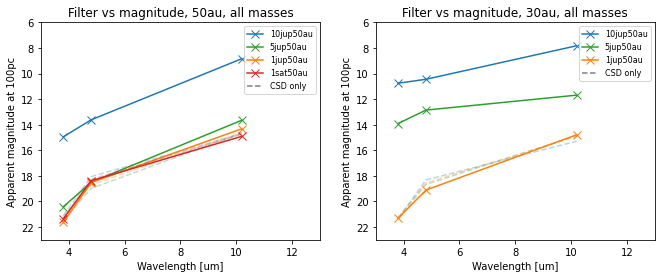

In [10]:
# filter vs mag, diff masses
colors= ['tab:blue','tab:green','tab:orange','tab:red']
plt.figure(figsize=(11,4))

plt.subplot(1,2,1)
for i in range(4):
    x, y = [3.8, 4.8, 10.2], data5_inc0.mag1[3*i:3*i+3]
    plt.plot(x, y, marker='x', markersize=8,label=data['model'][3*i], color=colors[i])
    plt.plot(x, data0_inc0.mag1[3*i:3*i+3], alpha=0.3, color=colors[i], linestyle='--')
plt.xlabel('Wavelength [um]')
plt.ylabel('Apparent magnitude at 100pc')
plt.title('Filter vs magnitude, 50au, all masses')
plt.xlim((3,13))
plt.ylim((23,6))
handles, labels = plt.gca().get_legend_handles_labels()
line = Line2D([0], [0], label='CSD only', color='gray', linestyle='--')
handles.append(line)
plt.legend(handles=handles,prop={'size': 8})
#plt.axhline(y=i, color='gray', linestyle='--')
    
plt.subplot(1,2,2)
for i in range(3):
    x, y = [3.8, 4.8, 10.2], data5_inc0.mag1[3*i+12:3*i+15]
    plt.plot(x, y, marker='x',markersize=8, label=data['model'][3*i], color=colors[i])
    plt.plot(x, data0_inc0.mag1[3*i+12:3*i+15], alpha=0.3, color=colors[i], linestyle='--')
handles, labels = plt.gca().get_legend_handles_labels()
line = Line2D([0], [0], label='CSD only', color='gray', linestyle='--')
handles.append(line)
plt.legend(handles=handles,prop={'size': 8})
plt.xlabel('Wavelength [um]')
plt.ylabel('Apparent magnitude at 100pc')
plt.title('Filter vs magnitude, 30au, all masses')
plt.xlim((3,13))
plt.ylim((23,6))